# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | lihue
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | namibe
Processing Record 14 of Set 1 | al ghayzah
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | papatowai
Processing Record 18 of Set 1 | nova sintra
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | constantia
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | hillvue
Processing Record 23 o

Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | landeck
Processing Record 43 of Set 4 | dehloran
Processing Record 44 of Set 4 | novobataysk
Processing Record 45 of Set 4 | aykhal
Processing Record 46 of Set 4 | saint-joseph
Processing Record 47 of Set 4 | jinchang
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | happy valley-goose bay
Processing Record 0 of Set 5 | yangor
City not found. Skipping...
Processing Record 1 of Set 5 | chonchi
Processing Record 2 of Set 5 | thurso
Processing Record 3 of Set 5 | besisahar
Processing Record 4 of Set 5 | ormara
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | akureyri
Processing Record 7 of Set 5 | st. john's
Processing Record 8 of Set 5 | fort mcmurray
Processing Record 9 of Set 5 | college
Processing Record 10 of Set 5 | wanning
Processing Record 11 of Set 5 | manismata
Processing Record 12 of Set 5 | gudul
Processing Record 13 of Set 5 | zaozersk
Processing Record 14 of 

City not found. Skipping...
Processing Record 36 of Set 8 | el calafate
Processing Record 37 of Set 8 | sandnessjoen
Processing Record 38 of Set 8 | hutchinson
Processing Record 39 of Set 8 | al kharijah
Processing Record 40 of Set 8 | hilo
Processing Record 41 of Set 8 | vila franca do campo
Processing Record 42 of Set 8 | olinda
Processing Record 43 of Set 8 | coyhaique
Processing Record 44 of Set 8 | placido de castro
Processing Record 45 of Set 8 | tamanrasset
Processing Record 46 of Set 8 | napili-honokowai
Processing Record 47 of Set 8 | conceicao da barra
Processing Record 48 of Set 8 | mordovo
Processing Record 49 of Set 8 | saint-pierre
Processing Record 0 of Set 9 | greymouth
Processing Record 1 of Set 9 | adre
Processing Record 2 of Set 9 | moussoro
Processing Record 3 of Set 9 | marsh harbour
Processing Record 4 of Set 9 | luderitz
Processing Record 5 of Set 9 | hasaki
Processing Record 6 of Set 9 | puerto aysen
Processing Record 7 of Set 9 | bealanana
Processing Record 8 o

Processing Record 24 of Set 12 | maros
City not found. Skipping...
Processing Record 25 of Set 12 | vung tau
Processing Record 26 of Set 12 | fomeque
Processing Record 27 of Set 12 | belen
Processing Record 28 of Set 12 | saint-philippe
Processing Record 29 of Set 12 | karabash
Processing Record 30 of Set 12 | center
Processing Record 31 of Set 12 | labasa
Processing Record 32 of Set 12 | singaparna
Processing Record 33 of Set 12 | minas de marcona
Processing Record 34 of Set 12 | vernon
Processing Record 35 of Set 12 | newman
Processing Record 36 of Set 12 | northport
Processing Record 37 of Set 12 | castillos
Processing Record 38 of Set 12 | le lavandou
Processing Record 39 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 40 of Set 12 | macenta
Processing Record 41 of Set 12 | margate
Processing Record 42 of Set 12 | riyadh
Processing Record 43 of Set 12 | ad dawadimi
Processing Record 44 of Set 12 | longonjo
Processing Record 45 of Set 12 | ahau
City not found. S

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,15.31,58,75,2.57,CA,1684981280
1,tura,25.5198,90.2201,26.64,62,3,2.13,IN,1684981762
2,port lincoln,-34.7333,135.8667,14.34,73,54,9.02,AU,1684981728
3,thompson,55.7435,-97.8558,19.09,27,75,2.06,CA,1684981744
4,ushuaia,-54.8000,-68.3000,5.81,56,40,4.63,AR,1684981711


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.31,58,75,2.57,CA,1684981280
1,tura,25.5198,90.2201,26.64,62,3,2.13,IN,1684981762
2,port lincoln,-34.7333,135.8667,14.34,73,54,9.02,AU,1684981728
3,thompson,55.7435,-97.8558,19.09,27,75,2.06,CA,1684981744
4,ushuaia,-54.8000,-68.3000,5.81,56,40,4.63,AR,1684981711


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

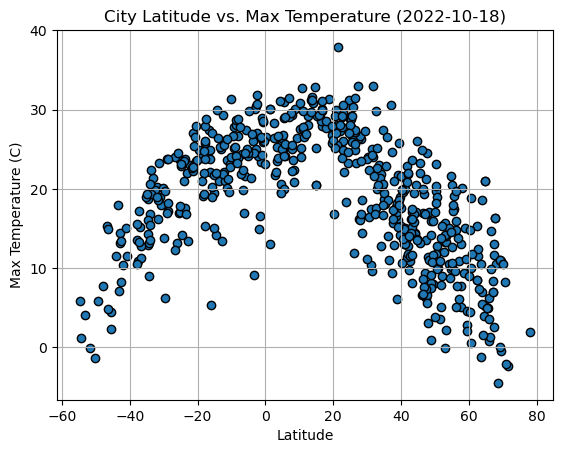

In [18]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

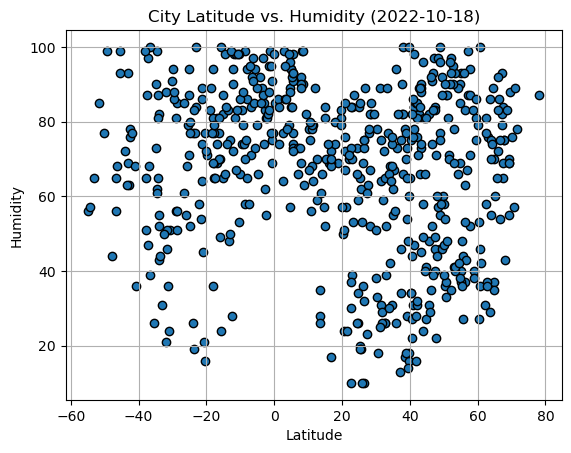

In [19]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

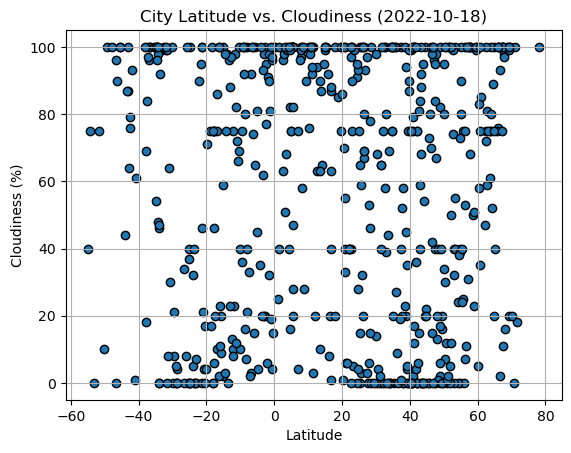

In [20]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

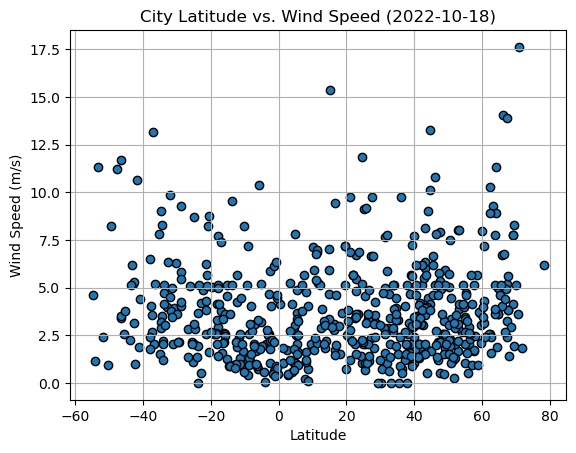

In [111]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [135]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.31,58,75,2.57,CA,1684981280
1,tura,25.5198,90.2201,26.64,62,3,2.13,IN,1684981762
3,thompson,55.7435,-97.8558,19.09,27,75,2.06,CA,1684981744
7,albany,42.6001,-73.9662,10.87,82,81,3.06,US,1684981738
10,lihue,21.9789,-159.3672,27.58,70,40,5.66,US,1684981754


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port lincoln,-34.7333,135.8667,14.34,73,54,9.02,AU,1684981728
4,ushuaia,-54.8000,-68.3000,5.81,56,40,4.63,AR,1684981711
5,port-aux-francais,-49.3500,70.2167,5.84,99,100,8.21,TF,1684981737
6,port mathurin,-19.6833,63.4167,24.96,71,71,5.03,MU,1684981747
8,grytviken,-54.2811,-36.5092,1.14,57,75,1.13,GS,1684981738


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6079524661968216
None


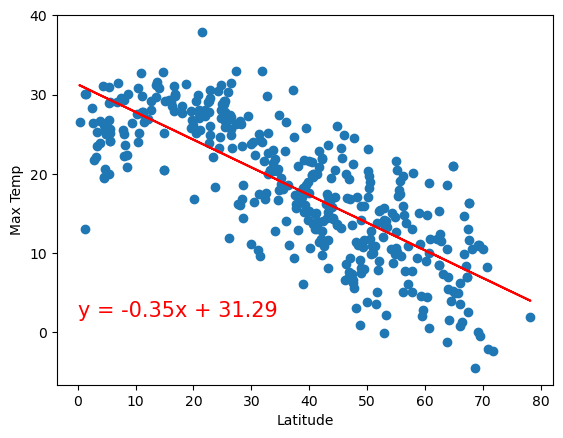

In [116]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,2),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

The r-value is: 0.563663964232332
None


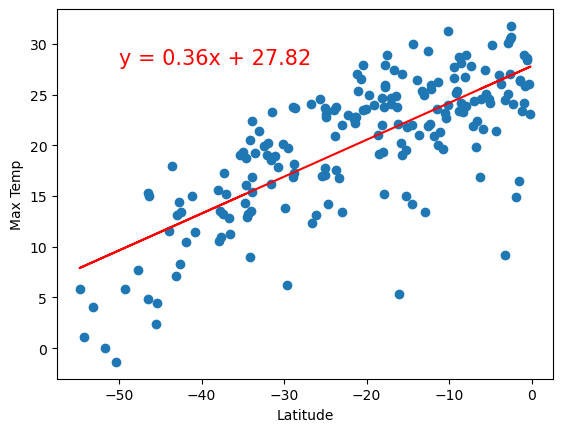

In [120]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,28),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

**Discussion about the linear relationship:** There is a moderately strong negative correlation between latitude and max tempuarture in the cities in the northern hemisphere and a moderately strong negative correlation between latitude and max temperature in the cities in the southern hemisphere. This makes sense because temperature will tend to increase the closer you are to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008320602232121645
None


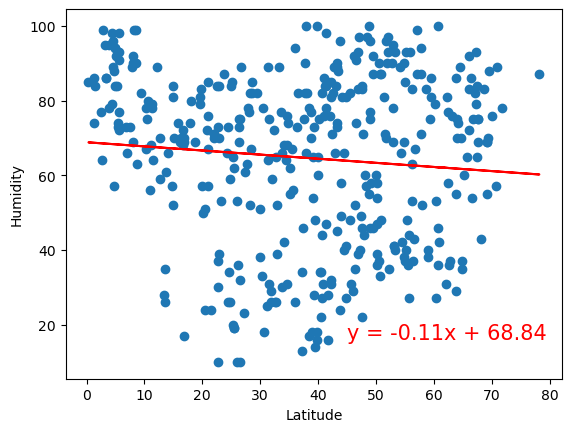

In [123]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,16),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

The r-value is: 0.06998678672984868
None


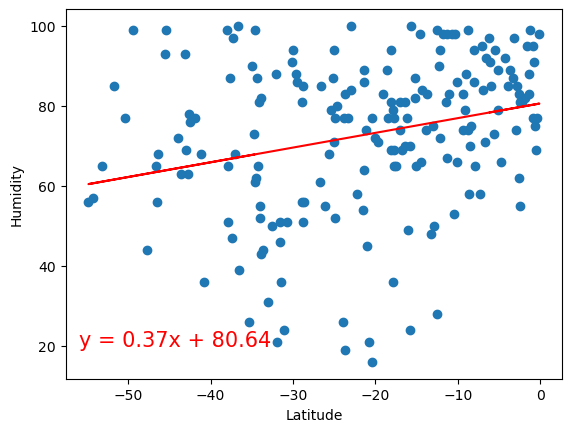

In [126]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-56,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

**Discussion about the linear relationship:** There is a very weak, correlation (almost none) between latitude and humidity in both hemispheres. This makes sense because places tend to be more humid when they are close to water and latitude does not necessarily describe places close to water.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010577034810400529
None


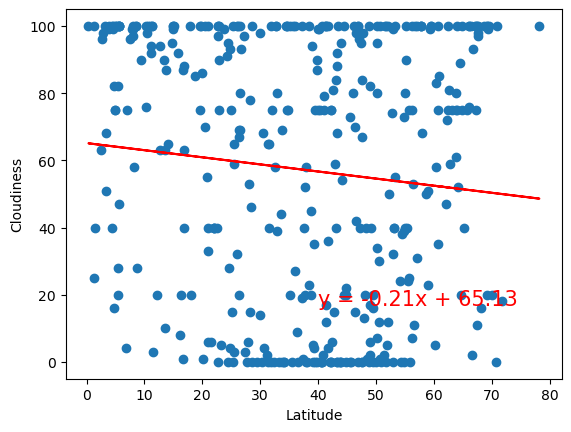

In [129]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,17),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

The r-value is: 0.0025401041710575185
None


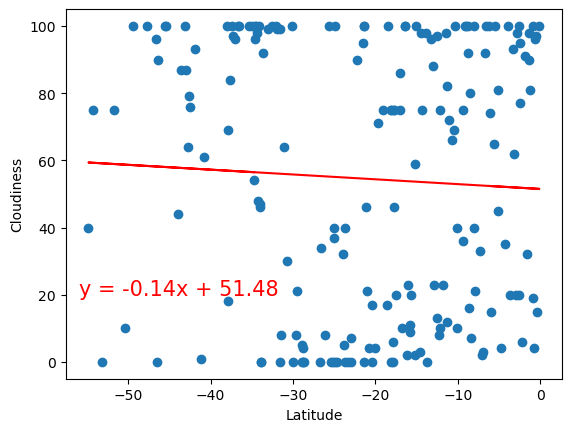

In [132]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-56,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

**Discussion about the linear relationship:** There is a very weak, correlation (almost none) between latitude and cloud cover in both hemispheres. This makes sense because clouds form from moisture and latitude is not describing places with water nearby or places with mountains that help form clouds above them.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030704237069135266
None


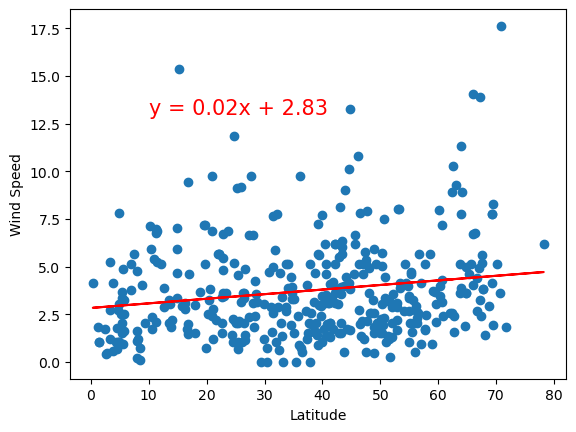

In [136]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,13),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

The r-value is: 0.10537359955555688
None


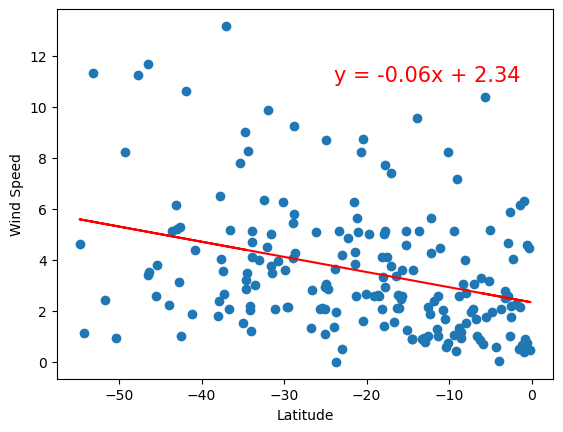

In [100]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-24,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(print(f"The r-value is: {rvalue**2}"))
plt.show()

**Discussion about the linear relationship:** There is a very weak, correlation (almost none) between latitude and wind speed in both hemispheres. This makes sense because wind is usually determined by how closely packed the air molecules are and that is not what laititude is describing.